In [2]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

In [3]:
# Read in the training data

train_path = '../data/train.csv'
train = pd.read_csv(train_path)

In [4]:
# Read in the testing data

test_path = '../data/test.csv'
test = pd.read_csv(test_path)

In [5]:
# Show more rows and columns

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

## Initial Data Exploration

In [7]:
# Initial showing of columns

train.head();
test.head();

In [11]:
# Datatypes seem to be appropriate and were preserved based on the information being conveyed in the data dictionary.

train.dtypes;
test.dtypes;

In [14]:
# Get value counts for each column. The values seemed to be composed of only objects, numerical or NaN values.

column_names = train.columns
for column in column_names:
    print(train[column].value_counts())

2047    1
2787    1
1058    1
1060    1
1062    1
       ..
2550    1
2552    1
505     1
507     1
2049    1
Name: Id, Length: 2051, dtype: int64
532351060    1
535303150    1
909250210    1
905377130    1
527403020    1
            ..
535403150    1
528477070    1
528104080    1
533120030    1
533250050    1
Name: PID, Length: 2051, dtype: int64
20     770
60     394
50     198
120    132
30     101
70      90
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
78.0      33
24.0      33
21.0      32
74.0      31
90.0      31
64.0      31
72.0      30
62.0      28
68.0      28
73.0      25
100.0     23
82.0      21
52.0      20
57.0      20
43.0      20
7

In [15]:
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


In [19]:
# Find null value counts

train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [20]:
# Find null value counts

test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [21]:
# Columns with quantities of null values close to the number of rows in the dataframe did not provide meaningful information
# given the data being presented and were dropped from the data set.

train_clean = train.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature'])
test_clean = test.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature'])

The columns with null counts close to the number of rows are going to be bad predictors of house price.

I might be able to draw some conclusions about the effect of fireplace on house price.

## Strategy for Imputing Null Values

NaN values were imputed with the following values per the data dictionary:

    1) 0 for numeric variables.
    2) 'NA' or 'None' for situations where the home did not contain the feature in question.

In [36]:
# Impute training null values as needed

train_clean['Lot Frontage'] = train_clean['Lot Frontage'].fillna(0)
train_clean['Mas Vnr Type'] = train_clean['Mas Vnr Type'].fillna('None')
train_clean['Mas Vnr Area'] = train_clean['Mas Vnr Area'].fillna(0)
train_clean['Bsmt Qual'] = train_clean['Bsmt Qual'].fillna('NA')
train_clean['Bsmt Cond'] = train_clean['Bsmt Cond'].fillna('NA')
train_clean['Bsmt Exposure'] = train_clean['Bsmt Exposure'].fillna('NA')
train_clean['BsmtFin Type 1'] = train_clean['BsmtFin Type 1'].fillna('NA')
train_clean['BsmtFin SF 1'] = train_clean['BsmtFin SF 1'].fillna(0)
train_clean['BsmtFin Type 2'] = train_clean['BsmtFin Type 2'].fillna('NA')
train_clean['BsmtFin SF 2'] = train_clean['BsmtFin SF 2'].fillna(0)
train_clean['Bsmt Unf SF'] = train_clean['Bsmt Unf SF'].fillna(0)
train_clean['Total Bsmt SF'] = train_clean['Total Bsmt SF'].fillna(0)
train_clean['Bsmt Full Bath'] = train_clean['Bsmt Full Bath'].fillna(0)
train_clean['Bsmt Half Bath'] = train_clean['Bsmt Half Bath'].fillna(0)
train_clean['Fireplace Qu'] = train_clean['Fireplace Qu'].fillna('NA')
train_clean['Garage Type'] = train_clean['Garage Type'].fillna('NA')
train_clean['Garage Yr Blt'] = train_clean['Garage Yr Blt'].fillna(0)
train_clean['Garage Finish'] = train_clean['Garage Finish'].fillna('NA')
train_clean['Garage Cars'] = train_clean['Garage Cars'].fillna(0)
train_clean['Garage Area'] = train_clean['Garage Area'].fillna(0)
train_clean['Garage Qual'] = train_clean['Garage Qual'].fillna('NA')
train_clean['Garage Cond'] = train_clean['Garage Cond'].fillna('NA')

train_clean.isnull().sum();

In [38]:
# Impute testing null values as needed

test_clean['Lot Frontage'] = test_clean['Lot Frontage'].fillna(0)
test_clean['Mas Vnr Type'] = test_clean['Mas Vnr Type'].fillna('None')
test_clean['Mas Vnr Area'] = test_clean['Mas Vnr Area'].fillna(0)
test_clean['Bsmt Qual'] = test_clean['Bsmt Qual'].fillna('NA')
test_clean['Bsmt Cond'] = test_clean['Bsmt Cond'].fillna('NA')
test_clean['Bsmt Exposure'] = test_clean['Bsmt Exposure'].fillna('NA')
test_clean['BsmtFin Type 1'] = test_clean['BsmtFin Type 1'].fillna('NA')
test_clean['BsmtFin SF 1'] = test_clean['BsmtFin SF 1'].fillna(0)
test_clean['BsmtFin Type 2'] = test_clean['BsmtFin Type 2'].fillna('NA')
test_clean['BsmtFin SF 2'] = test_clean['BsmtFin SF 2'].fillna(0)
test_clean['Bsmt Unf SF'] = test_clean['Bsmt Unf SF'].fillna(0)
test_clean['Total Bsmt SF'] = test_clean['Total Bsmt SF'].fillna(0)
test_clean['Bsmt Full Bath'] = test_clean['Bsmt Full Bath'].fillna(0)
test_clean['Bsmt Half Bath'] = test_clean['Bsmt Half Bath'].fillna(0)
test_clean['Electrical'] = test_clean['Electrical'].fillna(0)
test_clean['Fireplace Qu'] = test_clean['Fireplace Qu'].fillna('NA')
test_clean['Garage Type'] = test_clean['Garage Type'].fillna('NA')
test_clean['Garage Yr Blt'] = test_clean['Garage Yr Blt'].fillna(0)
test_clean['Garage Finish'] = test_clean['Garage Finish'].fillna('NA')
test_clean['Garage Cars'] = test_clean['Garage Cars'].fillna(0)
test_clean['Garage Area'] = test_clean['Garage Area'].fillna(0)
test_clean['Garage Qual'] = test_clean['Garage Qual'].fillna('NA')
test_clean['Garage Cond'] = test_clean['Garage Cond'].fillna('NA')

test_clean.isnull().sum();

In [28]:
# Get summary statistics

train_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [29]:
# This is the mean sale price of a home in Ames, IA based on the training data given

train_clean.describe().T['mean']['SalePrice']

181469.70160897123

In [30]:
# Get summary statistics

test_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,879.0,1.445588e+03,8.507171e+02,2.0,692.5,1435.0,2197.0,2.928000e+03
PID,879.0,7.165050e+08,1.889135e+08,526302110.0,528486085.0,535454160.0,907192140.0,1.007100e+09
MS SubClass,879.0,5.827076e+01,4.221139e+01,20.0,20.0,50.0,70.0,1.900000e+02
Lot Frontage,879.0,5.695563e+01,3.433868e+01,0.0,40.0,60.0,78.5,1.820000e+02
Lot Area,879.0,1.034092e+04,1.004734e+04,1477.0,7298.5,9453.0,11606.5,2.152450e+05
Overall Qual,879.0,6.054608e+00,1.374756e+00,2.0,5.0,6.0,7.0,1.000000e+01
Overall Cond,879.0,5.565415e+00,1.128422e+00,1.0,5.0,5.0,6.0,9.000000e+00
Year Built,879.0,1.970534e+03,3.040353e+01,1880.0,1954.0,1972.0,2000.0,2.010000e+03
Year Remod/Add,879.0,1.984445e+03,2.045455e+01,1950.0,1967.0,1992.0,2003.0,2.010000e+03
Mas Vnr Area,879.0,1.068612e+02,1.882841e+02,0.0,0.0,0.0,173.0,1.378000e+03


## Data Visualization & Outlier Examination

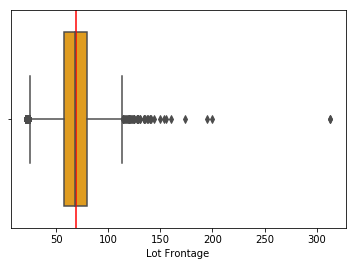

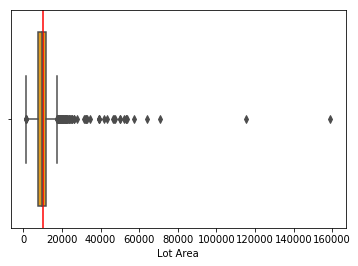

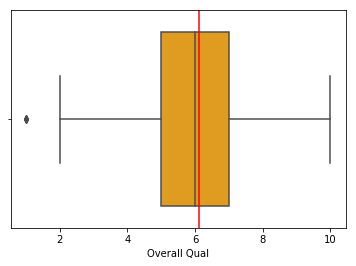

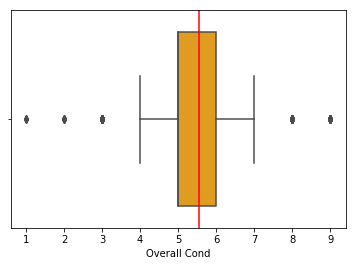

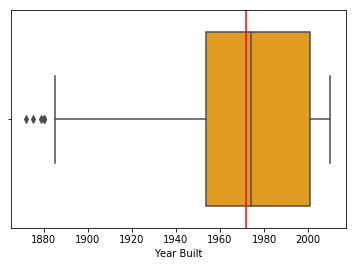

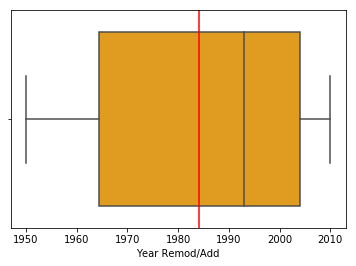

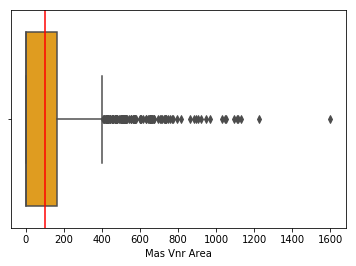

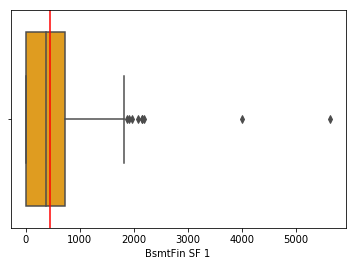

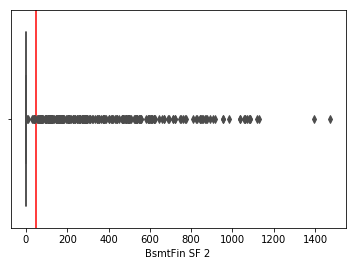

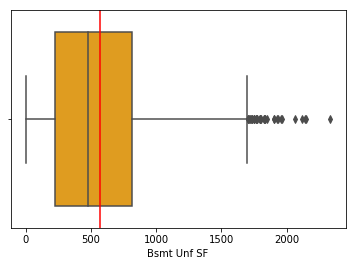

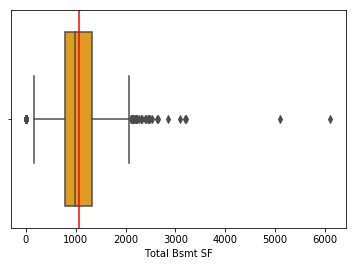

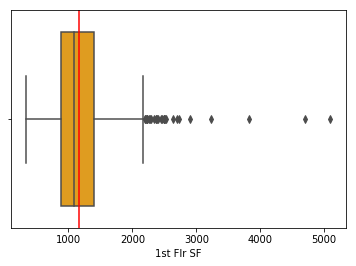

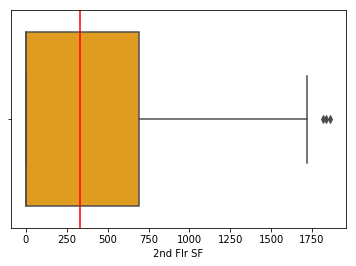

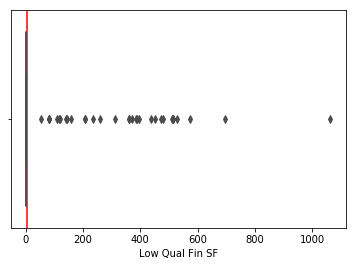

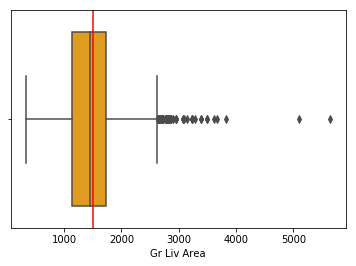

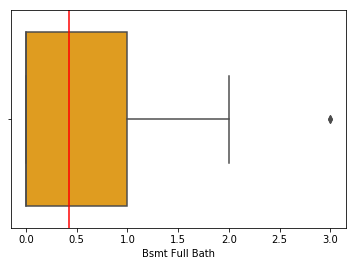

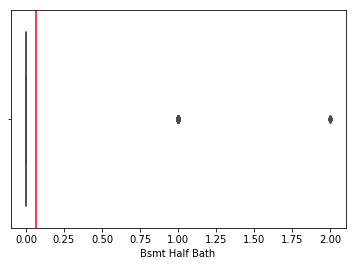

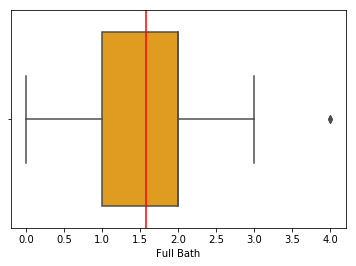

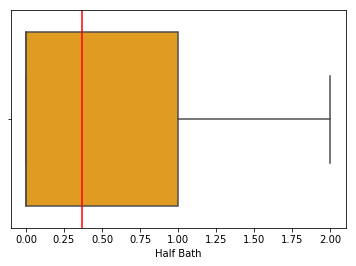

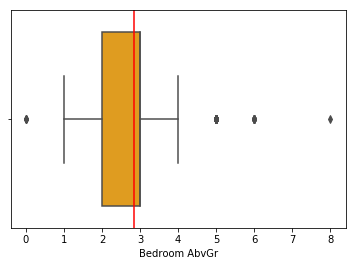

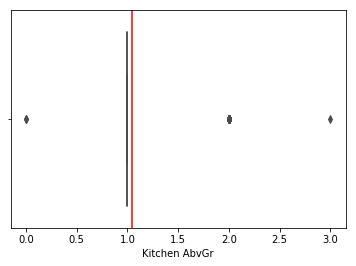

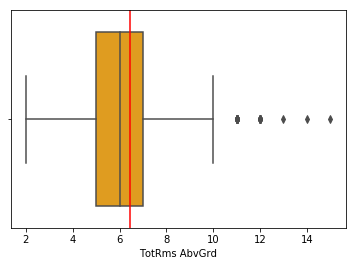

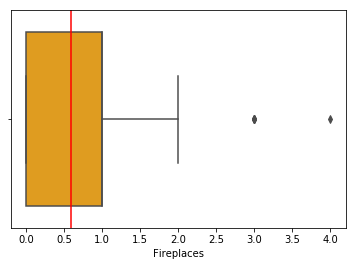

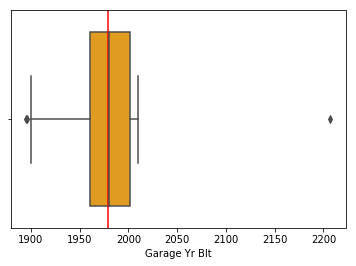

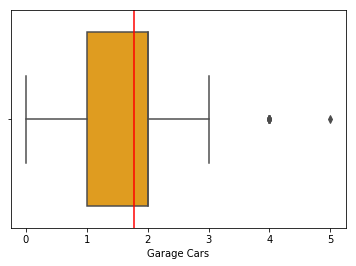

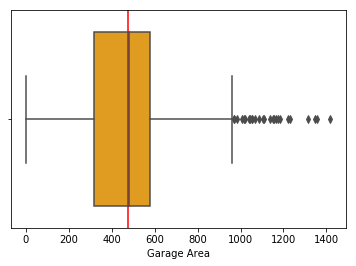

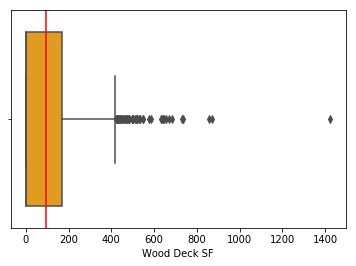

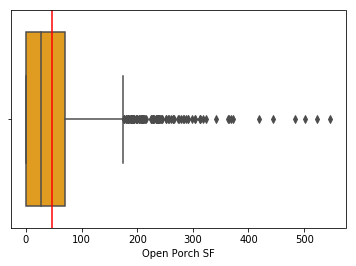

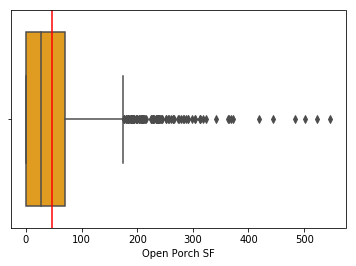

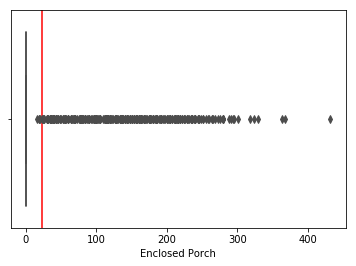

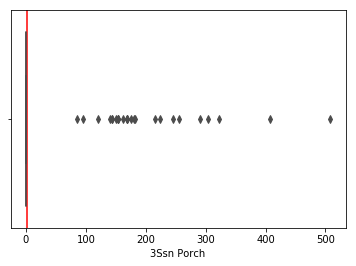

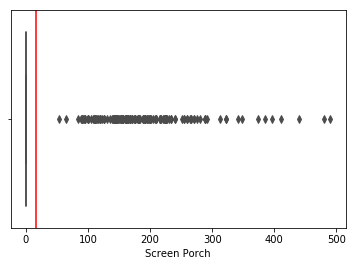

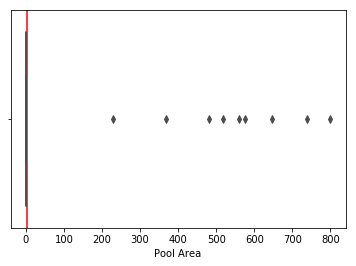

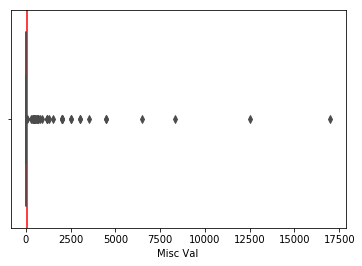

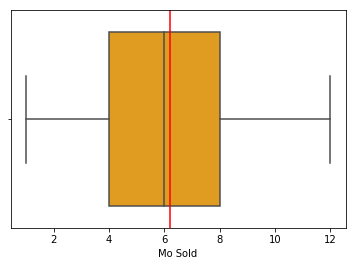

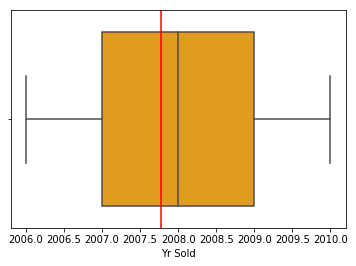

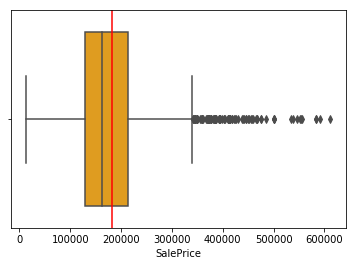

In [87]:
# Create boxplots for relevant numerical columns in the training data to show outliers in the data

train_column_names = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 
                         'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                         'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                         'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
                         'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
                         'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Open Porch SF', 'Enclosed Porch',
                         '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

for i in train_column_names:
    plt.figure()
    sns.boxplot(train[i], color='orange')
    plt.vlines(x = np.mean(train[i]), 
          ymin = -1000,
          ymax = 1000,
          color = 'red');

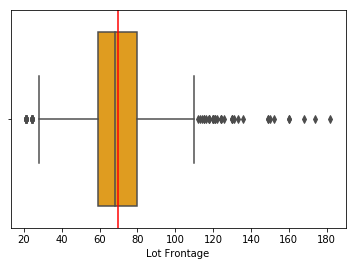

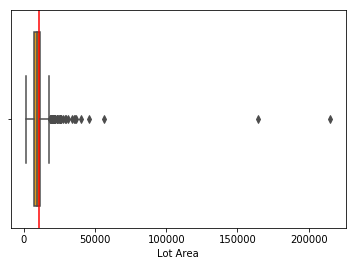

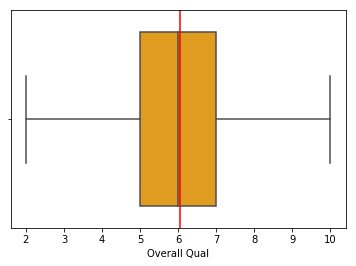

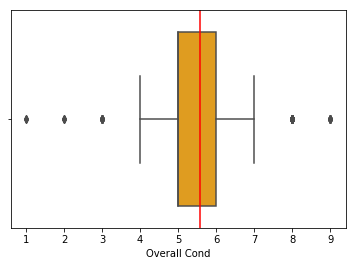

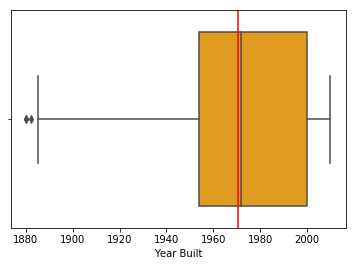

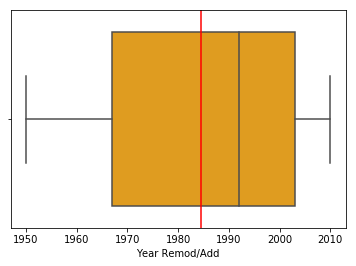

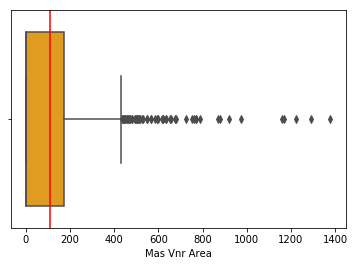

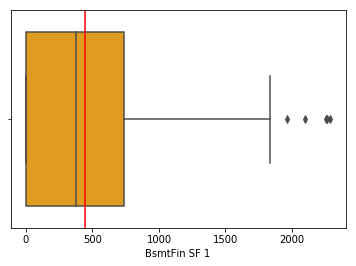

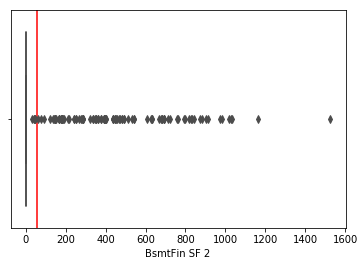

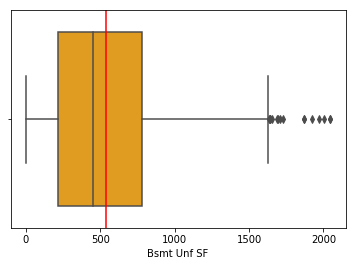

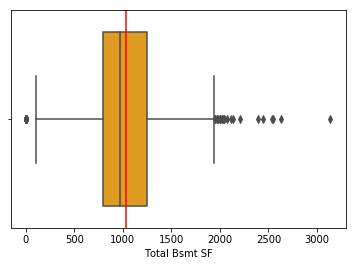

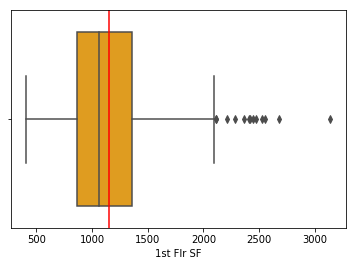

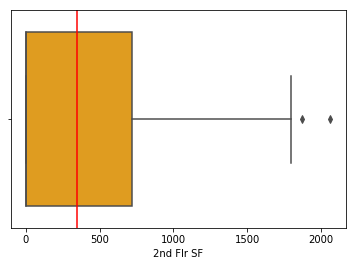

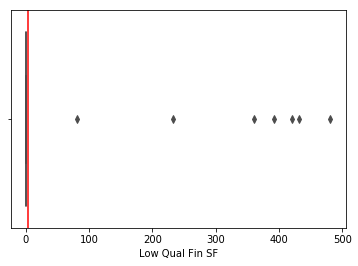

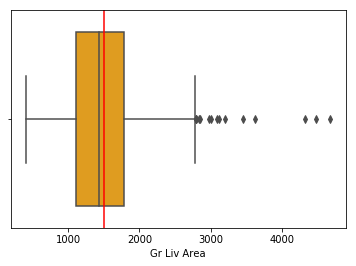

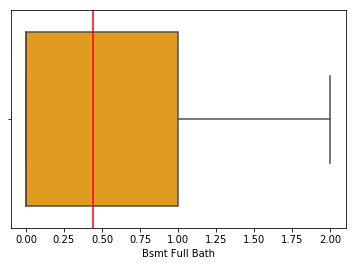

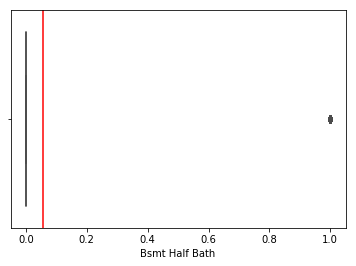

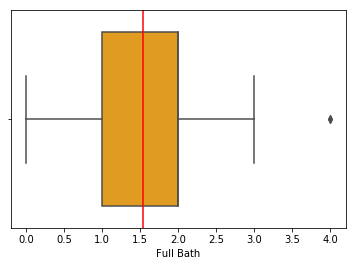

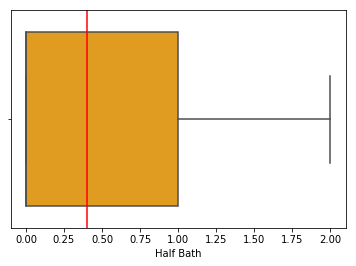

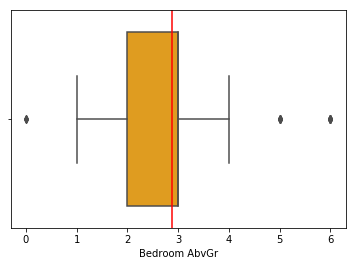

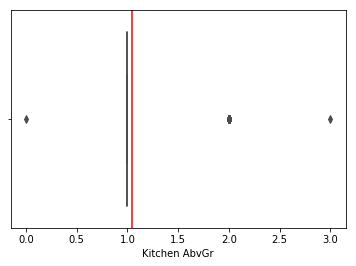

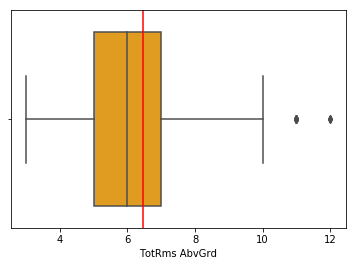

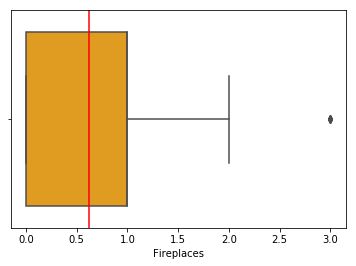

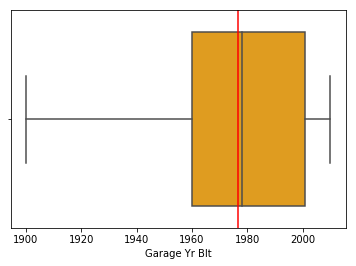

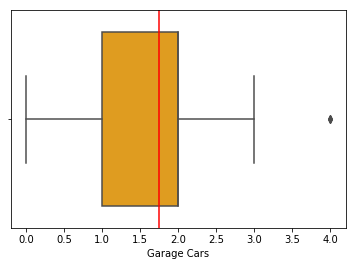

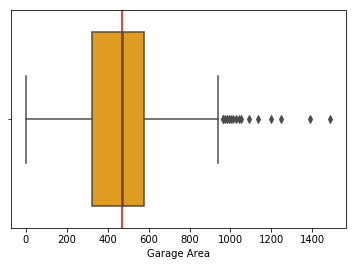

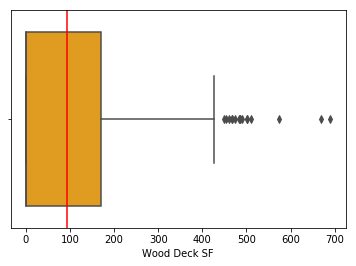

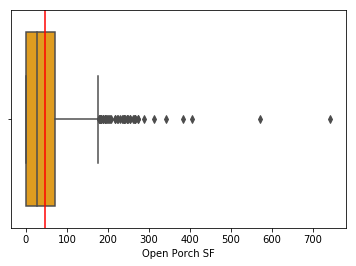

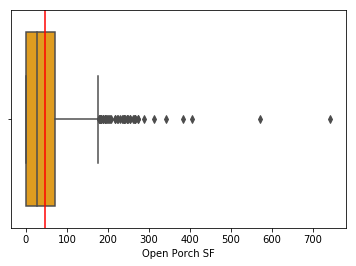

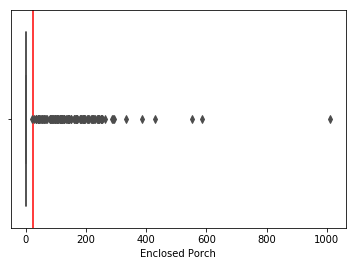

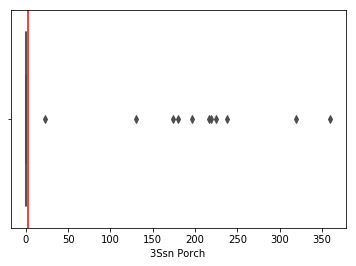

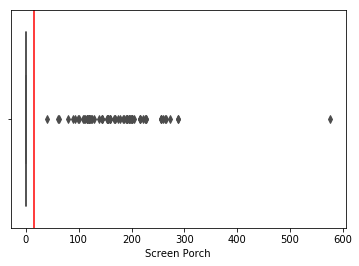

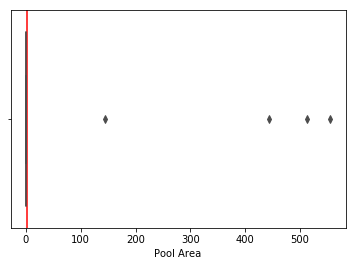

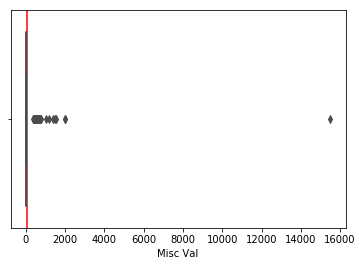

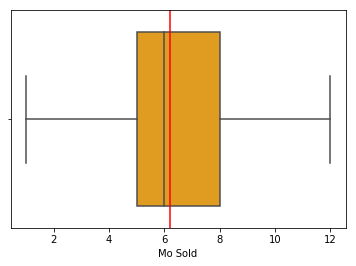

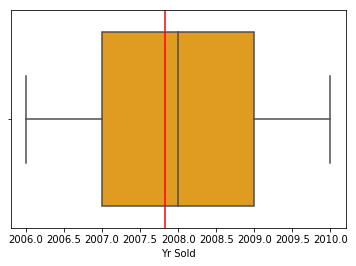

In [80]:
# Create boxplots for relevant numerical columns in the testing data to show outliers in the data

test_column_names = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 
                         'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                         'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                         'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
                         'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
                         'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Open Porch SF', 'Enclosed Porch',
                         '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']

for i in test_column_names:
    plt.figure()
    sns.boxplot(test[i], color='orange')
    plt.vlines(x = np.mean(test[i]), 
          ymin = -1000,
          ymax = 1000,
          color = 'red');

In [62]:
# There are several pieces of land with an overall quality rating of 1.

train[train['Overall Qual'] < 2]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
635,2904,923125030,20,A (agr),125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,81500
1372,766,904301375,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350.0,Unf,0.0,333.0,683.0,GasA,Gd,N,FuseA,904,0,0,904,1.0,0.0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,61000
1428,1902,534450090,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,334,0,0,334,0.0,0.0,1,0,1,1,Fa,2,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,39300


In [63]:
test[test['Overall Qual'] < 2]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [64]:
# There are two pieces of property with extraordinarily high square footage values that seem to have sold for moderate prices

train[train['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [65]:
test[test['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
76,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New
171,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD
464,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD


In [66]:
# The mean sale price for homes with very large Garage Area values is well above average; this is to be expected.

train[train['Garage Area'] > 1200]['SalePrice'].mean()

288416.6666666667

In [67]:
test[test['Garage Area'] > 1200]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
86,427,528108020,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2009,New
400,1558,911226010,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD
581,1259,535380140,50,RL,60.0,10836,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,892,892,GasA,Ex,Y,SBrkr,1254,182,0,1436,0,1,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1968.0,Unf,4,1488,Fa,TA,N,0,0,100,0,0,0,NaN,GdWo,NaN,0,6,2008,WD


In [72]:
# The mean sale price for homes with very large garage car capacity values is above average; this is to be expected.

print(train[train['Garage Cars'] >= 4]['SalePrice'].mean())
train[train['Garage Cars'] >= 4]

222285.7142857143


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
194,670,535402330,90,RL,91.0,11643,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,Duplex,2Story,5,5,1969,1969,Gable,CompShg,MetalSd,MetalSd,BrkFace,368.0,TA,TA,CBlock,TA,TA,No,LwQ,500.0,Unf,0.0,748.0,1248.0,GasA,TA,Y,SBrkr,1338,1296,0,2634,1.0,1.0,2,2,6,2,TA,12,Typ,0,NaN,Detchd,1969.0,Unf,4.0,968.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,200000
289,1590,923202015,90,RM,78.0,7060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,200.0,TA,Gd,PConc,Gd,Gd,Gd,GLQ,1309.0,Unf,0.0,35.0,1344.0,GasA,Ex,Y,SBrkr,1344,0,0,1344,2.0,0.0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4.0,784.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,206300
332,1060,528118090,60,RL,96.0,12539,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,2Story,10,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,468.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1082.0,Unf,0.0,538.0,1620.0,GasA,Ex,Y,SBrkr,1632,1158,0,2790,1.0,0.0,2,1,4,1,Ex,10,Typ,1,Ex,BuiltIn,2005.0,Fin,4.0,1150.0,TA,TA,Y,30,200,0,0,192,0,NaN,NaN,NaN,0,6,2008,WD,460000
337,2283,923205025,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159.0,Unf,0.0,90.0,1249.0,GasA,Ex,Y,SBrkr,1622,0,0,1622,1.0,0.0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4.0,1356.0,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,168000
554,1669,527404140,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,858.0,858.0,GasA,TA,Y,SBrkr,872,0,0,872,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1974.0,Unf,4.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2007,WD,123000
613,247,906204230,60,RL,87.0,12361,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,7,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,85.0,Gd,Gd,PConc,Gd,TA,No,GLQ,860.0,Unf,0.0,86.0,946.0,GasA,Ex,Y,SBrkr,964,838,0,1802,0.0,1.0,2,1,3,1,Gd,8,Typ,1,Gd,2Types,2000.0,RFn,4.0,1017.0,TA,TA,Y,450,92,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,218000
925,747,903236040,30,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,5,1925,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,BrkTil,TA,TA,No,LwQ,134.0,Unf,0.0,938.0,1072.0,GasA,TA,Y,SBrkr,1072,0,0,1072,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1982.0,Unf,5.0,1184.0,Fa,TA,P,0,0,105,0,0,0,NaN,NaN,NaN,0,8,2009,WD,126500
1016,2905,923202025,90,RM,78.0,7020,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1997,Gable,CompShg,MetalSd,MetalSd,BrkFace,200.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1243.0,Unf,0.0,45.0,1288.0,GasA,Gd,Y,SBrkr,1368,0,0,1368,2.0,0.0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1997.0,Fin,4.0,784.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,215000
1166,2750,906225180,90,RL,73.0,9069,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,SFoyer,6,8,1993,1993,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,TA,Av,LwQ,261.0,GLQ,1083.0,0.0,1344.0,GasA,Gd,Y,SBrkr,1440,0,0,1440,2.0,0.0,2,

In [73]:
test[test['Garage Cars'] >= 4]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
13,818,906230030,90,RL,NaN,7976,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,7,5,2000,2000,Hip,CompShg,VinylSd,VinylSd,BrkFace,23.0,TA,TA,PConc,Ex,TA,No,GLQ,820,Unf,0,348,1168,GasA,Ex,Y,SBrkr,1168,1619,0,2787,2,0,4,2,6,2,TA,8,Typ,2,TA,BuiltIn,2000.0,Fin,4,820,TA,TA,Y,312,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD
32,717,902326030,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1880,2003,Mansard,CompShg,Stucco,Stucco,None,0.0,Gd,TA,Stone,TA,Fa,No,Unf,0,Unf,0,1240,1240,GasW,TA,N,SBrkr,1320,1320,0,2640,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1950.0,Unf,4,864,TA,TA,N,181,0,386,0,0,0,NaN,NaN,NaN,0,5,2009,WD
581,1259,535380140,50,RL,60.0,10836,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,892,892,GasA,Ex,Y,SBrkr,1254,182,0,1436,0,1,1,0,3,1,TA,7,Typ,1,Gd,Detchd,1968.0,Unf,4,1488,Fa,TA,N,0,0,100,0,0,0,NaN,GdWo,NaN,0,6,2008,WD


In [74]:
# It seems as if having an extraordinarily large basement does not influnce home price.
# These two outliers have 10/10 ratings for Overall Qual and 5/10 ratings for Overall Cond.
# It is difficult to say which feature has the most influence on the sale price without specific information about what
# these two factors mean

train[train['Total Bsmt SF'] > 5000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [75]:
test[test['Total Bsmt SF'] > 5000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [76]:
# Outliers with very large first floor square footage values seem to have widely varying sale prices

train[train['1st Flr SF'] > 3000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
328,1773,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228,0,0,3228,1.0,0.0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2.0,546.0,TA,TA,Y,264,75,291,0,0,0,NaN,NaN,NaN,0,5,2007,WD,430000
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [77]:
test[test['1st Flr SF'] > 3000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
76,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New


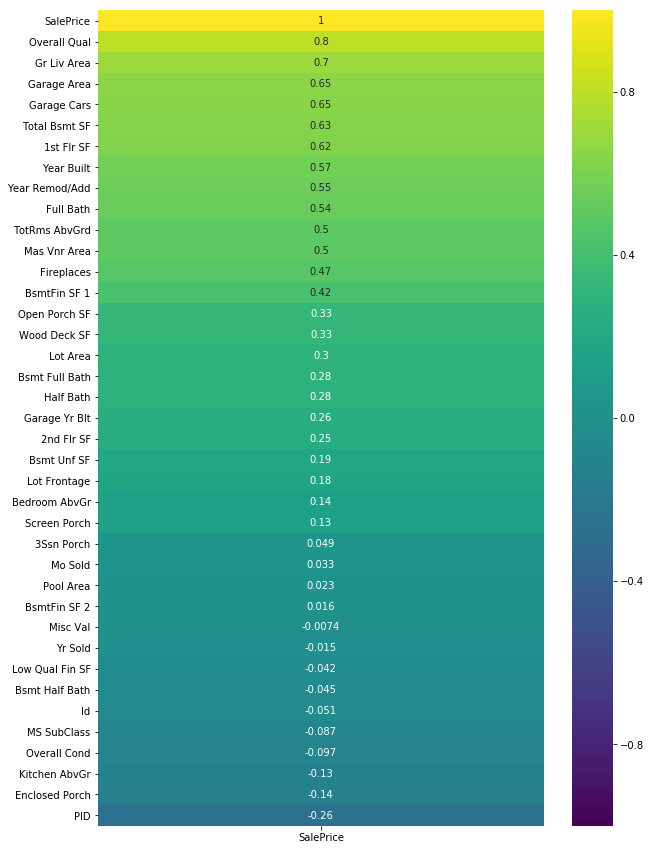

In [26]:
# Create a heatmap showing the correlation between SalePrice and all other data

plt.figure(figsize=(10,15))

# corr = train.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_clean.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), 
            
            annot=True, annot_kws={'size': 10}, cmap='viridis', vmin=-1, vmax=1);

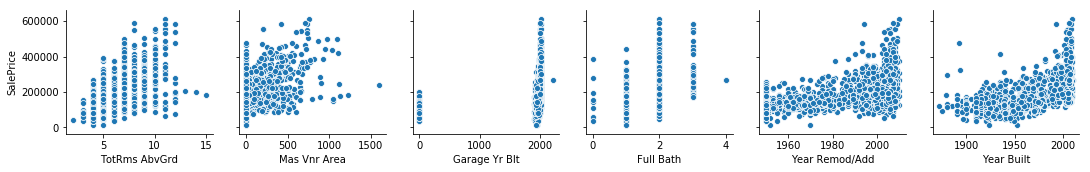

In [81]:
# Create a pairplot for the correlation values between 0.5 and 0.6

sns.pairplot(train_clean, x_vars=['TotRms AbvGrd', 'Mas Vnr Area', 'Garage Yr Blt', 'Full Bath', 'Year Remod/Add', 'Year Built'], 
            
                    y_vars=['SalePrice']);

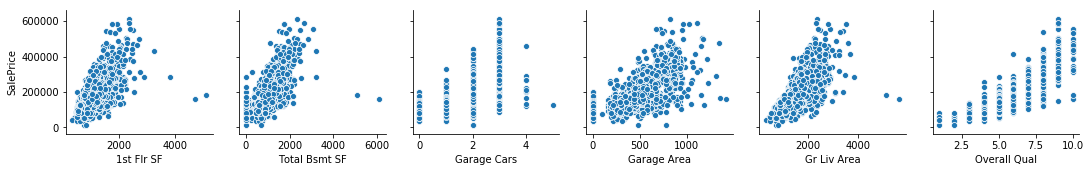

In [82]:
# Create a pairplot for the correlation values between 0.6 and 1.0

sns.pairplot(train_clean, x_vars=['1st Flr SF', 'Total Bsmt SF', 'Garage Cars', 'Garage Area', 'Gr Liv Area', 'Overall Qual'], 
            
                    y_vars=['SalePrice']);

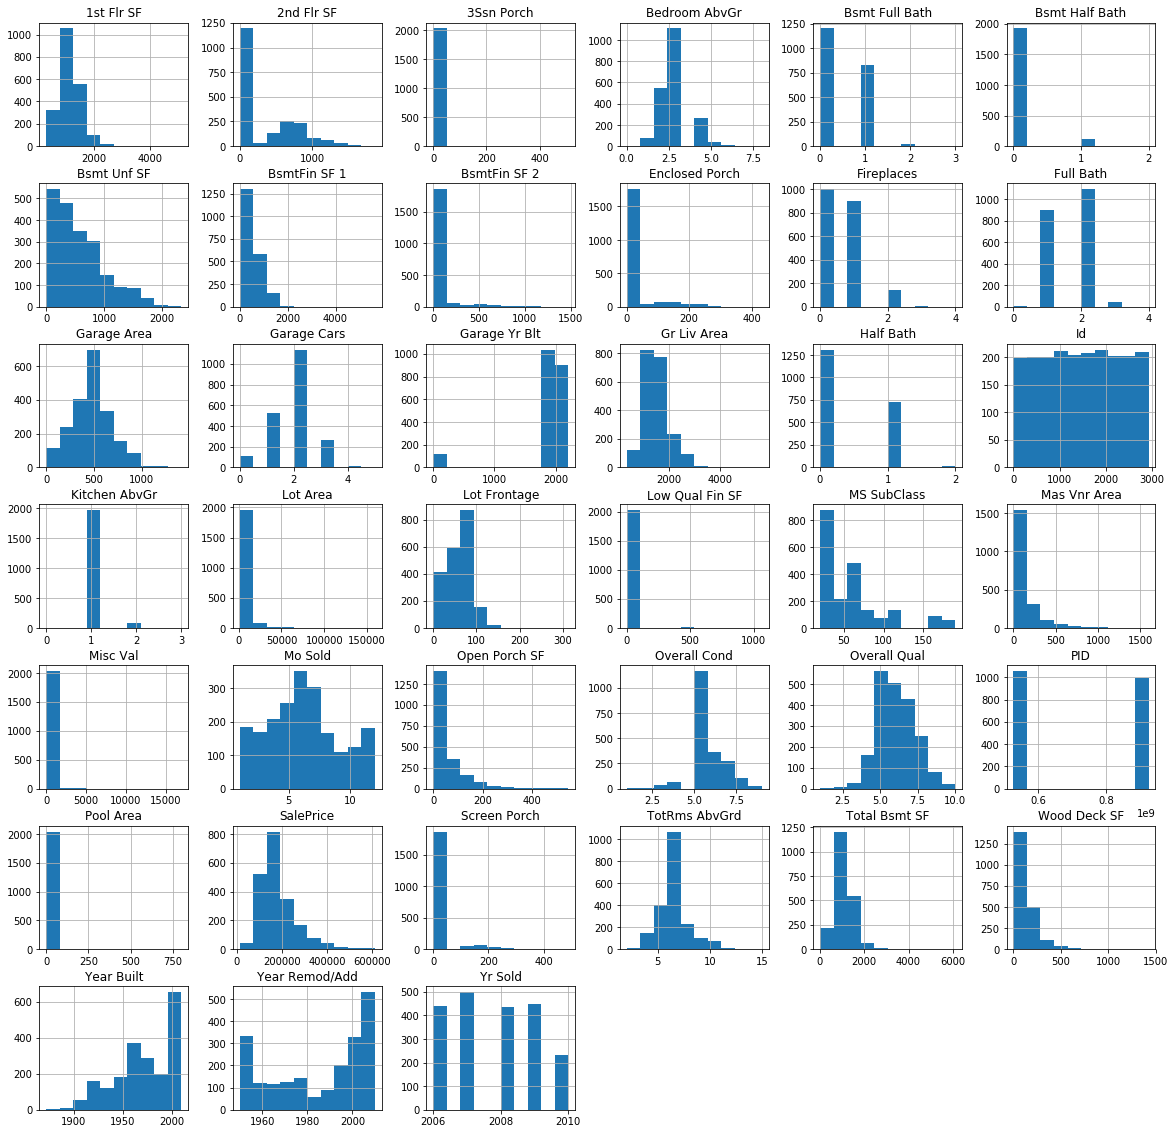

In [83]:
# Create histograms for numeric data

train_clean.hist(figsize=(20, 20));

In [84]:
# Output cleaned training data

train_clean.to_csv('../data/train_clean.csv')

In [85]:
# Output cleaned testing data

test_clean.to_csv('../data/test_clean.csv')